In [3]:
asset_list = ['AAPL']

In [4]:
import numpy as np 
import pandas as pd 
import os
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
warnings.filterwarnings('ignore')

folder_path = "..\Data Collection & Processing\historical_prices_data" 
forecasts_folder = "..\Data Collection & Processing\stock_forecasts"
performance_folder = "..\Data Collection & Processing\stock_performance"

for asset in asset_list: 
  file_path = os.path.join(folder_path, f"{asset}.csv")
  # Import the top 25 sp500 stocks dataset into a Pandas Dataframe
  df = pd.read_csv(
    file_path,  
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
  )
  

C:\Users\kahbe\AppData\Local\Temp\ipykernel_19600\804326233.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [5]:
df = df.reset_index()
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-11,18.950357,19.205357,18.910713,19.141430,16.860064,282256800
1,2014-02-12,19.176786,19.270000,19.044287,19.139999,16.858810,308100800
2,2014-02-13,19.094999,19.458929,19.078571,19.443930,17.126516,307398000
3,2014-02-14,19.373928,19.499287,19.328930,19.428213,17.112673,272924400
4,2014-02-18,19.500000,19.685356,19.486071,19.499643,17.175587,260251600
...,...,...,...,...,...,...,...
2512,2024-02-05,188.149994,189.250000,185.839996,187.679993,187.440811,69668800
2513,2024-02-06,186.860001,189.309998,186.770004,189.300003,189.058762,43490800
2514,2024-02-07,190.639999,191.050003,188.610001,189.410004,189.168625,53439000
2515,2024-02-08,189.389999,189.539993,187.350006,188.320007,188.080017,40962000


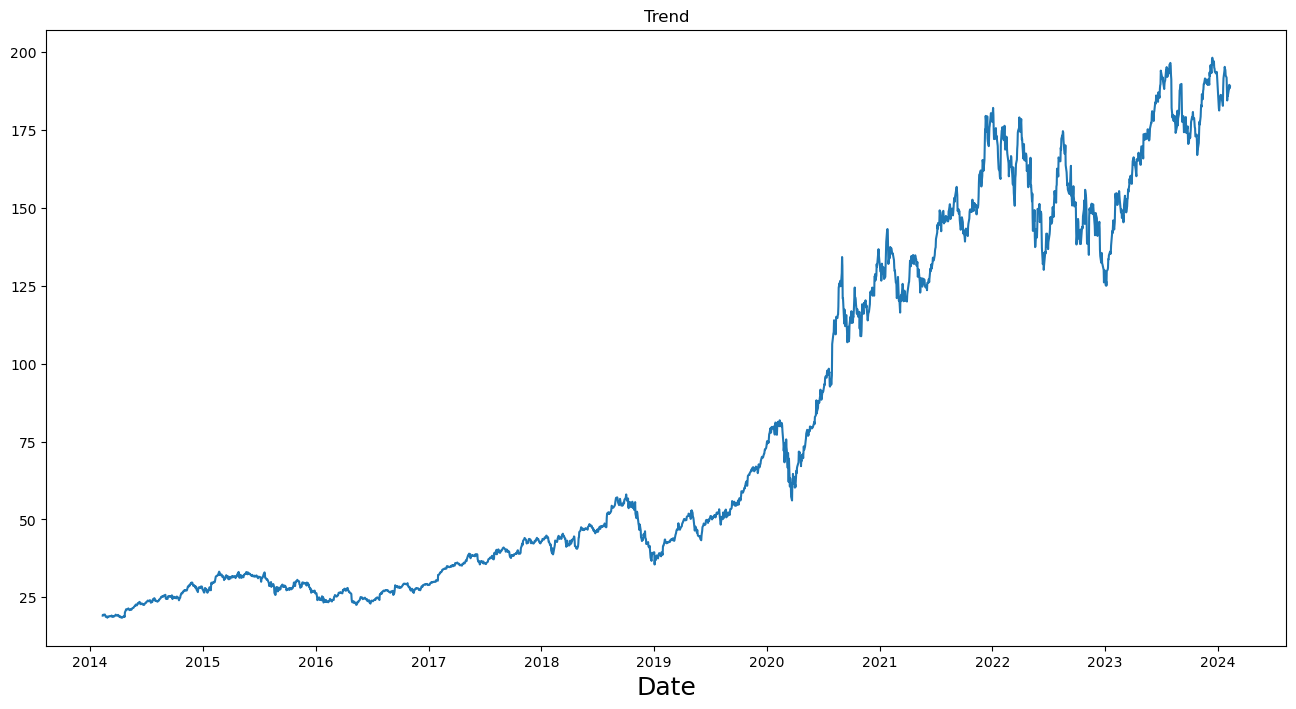

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [7]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Close'])

#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")
     

In [8]:
adfuller_test(df['Close'])


ADF Test Statistics : 0.13795760072909827
p-value : 0.968559101244976
#Lags Used : 18
Number of Observations Used : 2498
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [9]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)

df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']
     

0      -0.001431
1      -0.001431
2       0.303930
3      -0.015717
4       0.071430
          ...   
2512    1.829987
2513    1.620010
2514    0.110001
2515   -1.089996
2516    0.529999
Name: Close_shift, Length: 2517, dtype: float64

In [10]:
test_result = adfuller(df['Close_shift'])
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")
     

In [11]:
adfuller_test(df['Close_shift'])

ADF Test Statistics : -11.68595135349566
p-value : 1.6970269284767747e-21
#Lags Used : 17
Number of Observations Used : 2499
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


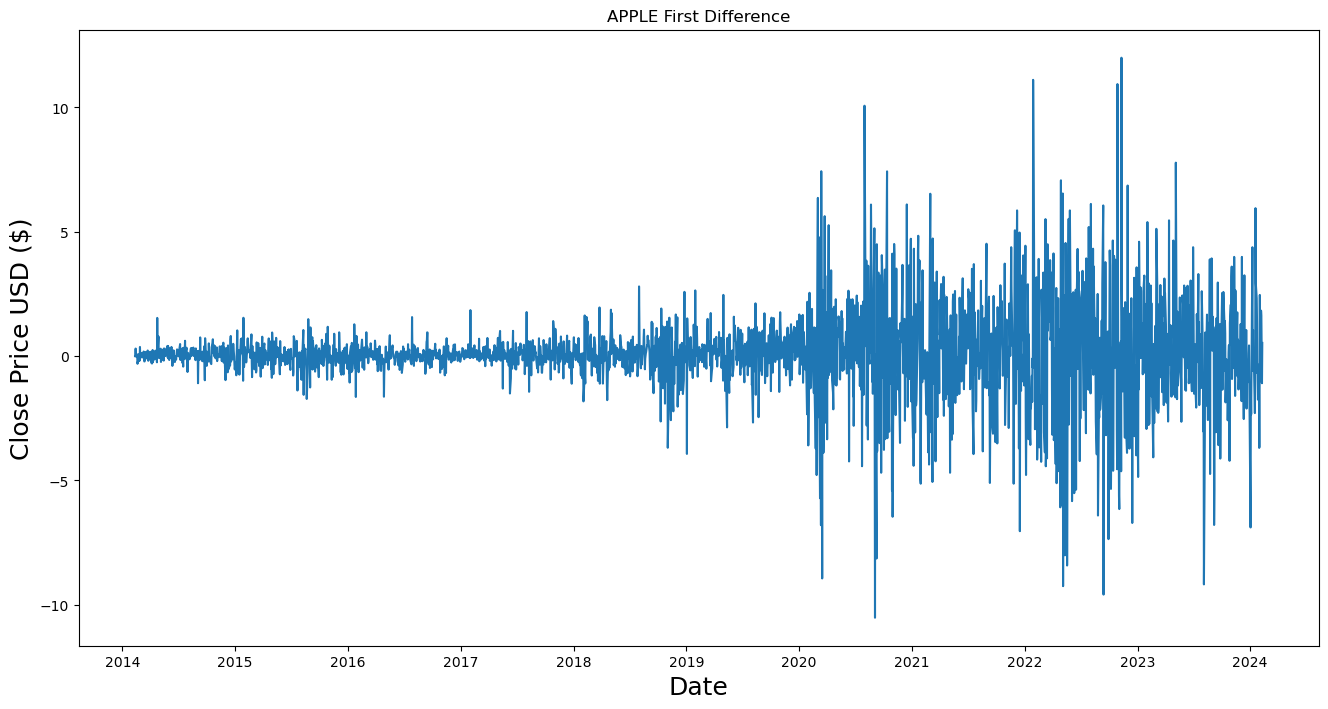

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

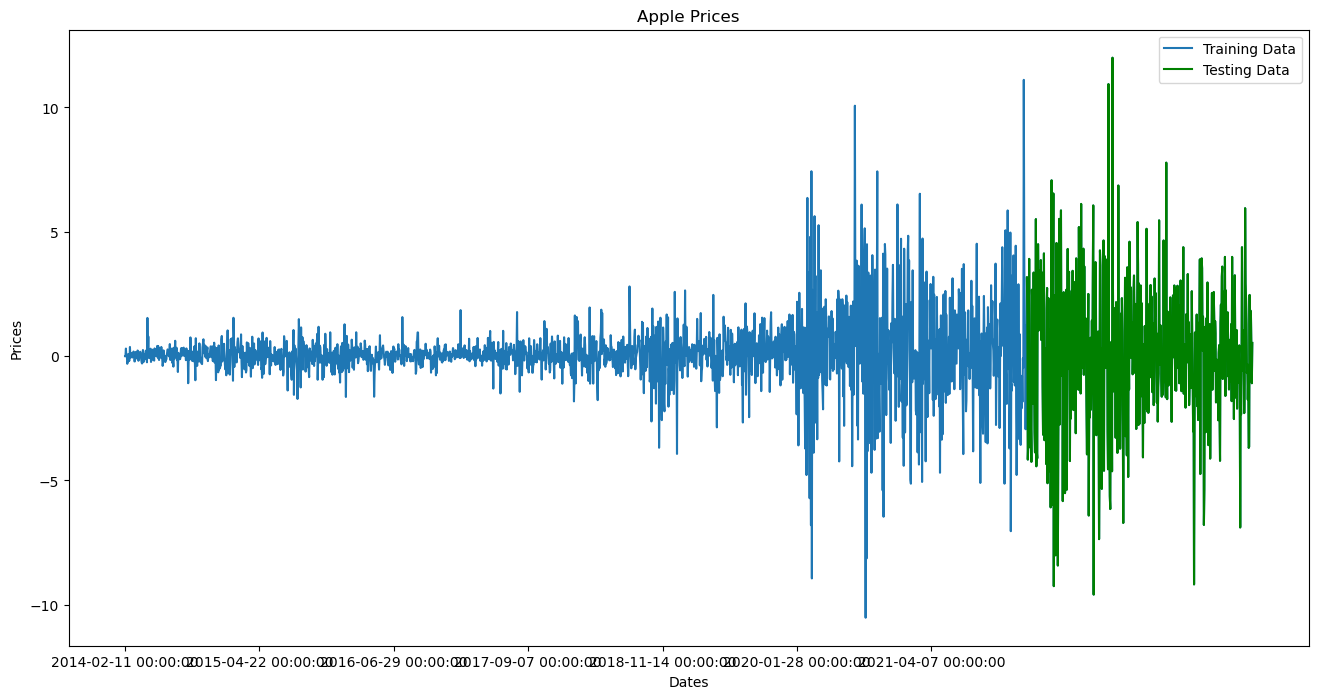

In [13]:

train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()
     

In [19]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
#model=ARIMA(train_data['Close_shift'],order=(1,1,1))
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()


     

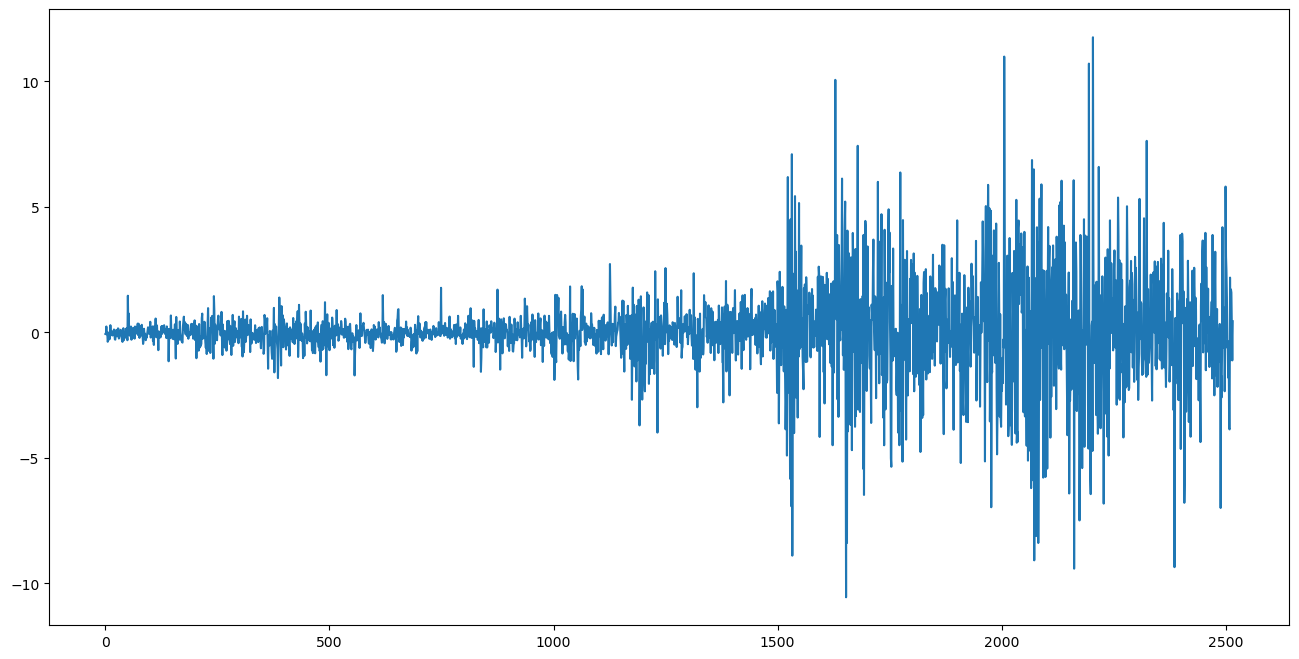

In [20]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

<AxesSubplot:ylabel='Density'>

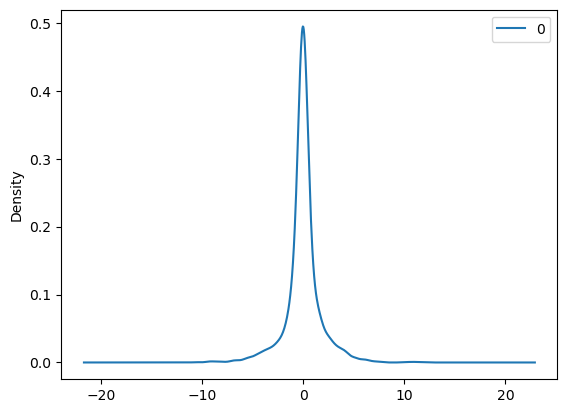

In [21]:
residuals.plot(kind='kde')

In [22]:

residuals.describe()

,0
count,2.517000e+03
mean,1.796195e-07
std,1.750679e+00
min,-1.055492e+01
25%,-4.637854e-01
50%,-3.277938e-02
75%,4.620460e-01
max,1.175536e+01


In [23]:
train_arima = train_data['Close_shift'].values
test_arima = test_data['Close_shift'].values

In [25]:
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

<class 'list'>
MSE : 12.339
RMSE : 3.513


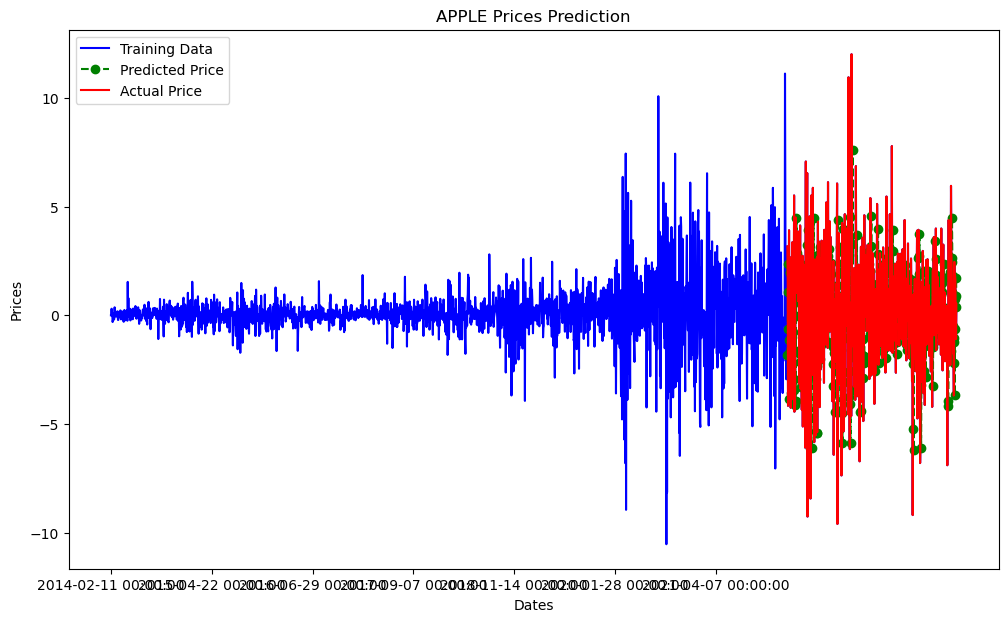

In [26]:
plt.figure(figsize=(12,7))
plt.plot(df['Close_shift'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()